[Click here for live site!](https://m-sender.github.io/ServiceLearning)
# **Analyzing 911 Calls**
# **--Max Sender and Sam Traylor--**

### Data set link: [Calls for service 2021](https://data.nola.gov/Public-Safety-and-Preparedness/Calls-for-Service-2021/3pha-hum9)

What this data set is a collection of 9-1-1 calls in 2021 in the New Orleans Area. This set contains basic things such as the type of incident, where it was, the police department, and timing, and more.

## Questions

#### The direction we're going with our project will focusing more on the crime aspect of the data set. This route will be more focused on answering questions about crime in specific areas instead of the emergency response.

*   Most frequent crimes in specific areas?

*   Based on the value counts of each type of crime in each area can we generalize patterns like violent crime happening more in one area, theft in another, etc?

*   What are the most frequest crimes by time of day in conjunction with a specific area?

#### We find this data set to be very insightful and can answer a lot of different questions. Another dataset that could be of use is [Police Zone Information](https://data.nola.gov/dataset/Police-Zones/fngt-zkj9). This lets us expand our questions to answer more zone and area specific questions. Questions that we can answer going this route are:

*   Average response time by incident?

*   Average response time by zone/area?

*   Average response time by incident in specific areas?

#### We will also be looking at and loading in Census data pertaining to the relavent zipcodes that are in the Calls to Service dataset.

## Collaboration plan:

We plan to collaborate via meetings over zoom, and store our data in a shared github. Any particular challenges that have to be solved in a pair-programming setting will be dealt with using live share on vscode.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_Calls_untidy = pd.read_csv("../data/Calls_for_Service_2021.csv")
df_zones_untidy = pd.read_csv("../data/Police_Zones_data.csv")

In [6]:
df_Calls = df_Calls_untidy.drop(columns=['NOPD_Item','Type','InitialType','MapX','MapY','Disposition','Beat'])
#set type to date time objects
df_Calls = df_Calls.astype({'TimeCreate':'datetime64[ns]','TimeDispatch':'datetime64[ns]',"TimeArrive":'datetime64[ns]',"TimeClosed":'datetime64[ns]'})
df_Calls.head()

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:40:31,Necessary Action Taken,Y,Vicksburg St & Brooks St,70124,3,POINT (-90.10764787 29.99729994)
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301)
2,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 03:03:53,Necessary Action Taken,Y,Decatur St & Iberville St,None,8,POINT (-90.06636912 29.95282347)
3,FIREWORKS,1A,FIREWORKS,2J,2021-01-01 00:02:13,NaT,NaT,2021-01-01 00:17:36,VOID,N,055XX Sutton Pl,70131,4,POINT (-89.9964721 29.91905338)
4,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:02:14,2021-01-01 07:08:36,NaT,2021-01-01 07:08:48,Necessary Action Taken,N,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289)


**Columns Explained:**
* TypeText: Type of incident (text)
* Priority: Priority of incident (ID)
* InitialTypeText: Initial type of incident (text)
* InitialPriority: Initial priority of incident (ID)
* TimeCreate: Time of incident
* TimeDispatch: Time of dispatch
* TimeArrive: Time of arrival
* TimeClose: Time of closure
* DispositionText: Disposition of incident (text)
* SelfInitiated: Self-initiated (Y or N)
* BLOCK_ADDRESS: Block address of incident
* Zip: Zip code of incident
* PoliceDistrict: Police district of incident (ID)
* Location: Location of incident (ID)
Each entry in the dataset in a unique call to 911 dispatch with relevant information.


In [7]:
df_zones_untidy.head(5)
df_zones = df_zones_untidy.set_index("OBJECTID")
df_zones.head()

,the_geom,Zone,District,Shape_Length,Shape_Area
OBJECTID,,,,,
1883,MULTIPOLYGON (((-90.066369220964 29.9528235013...,8C,8,6792.167688,2.012343e+06
1855,MULTIPOLYGON (((-90.096467011995 29.9414493437...,6K,6,8518.748545,4.324270e+06
1860,MULTIPOLYGON (((-90.100235367426 29.9209080675...,6P,6,11703.354343,7.651238e+06
1784,MULTIPOLYGON (((-90.108388478789 29.9349666704...,2I,2,14995.498757,1.318799e+07
1847,MULTIPOLYGON (((-90.065506929482 29.9391674081...,6C,6,13163.392602,5.747707e+06


**Columns Explained:**
* the_geom: Polygon defining the zone in question
* OBJECTID: The ID of the zone
* Zone: The police zone
* District: The district within the zone
* Shape_Length: The perimeter of the zone
* Share_Area: The the area inside of the zone

In [8]:
df_Calls["responseTime"] = df_Calls.TimeArrive - df_Calls.TimeDispatch

print("Maximum response time: ", df_Calls.responseTime.max())
print("Mean response time: ", df_Calls.responseTime.mean()) 
print("Minimum response time: ", df_Calls.responseTime.min(), "\n")

Maximum response time:  3 days 01:03:27
Mean response time:  0 days 00:07:25.337898940
Minimum response time:  -1 days +10:11:08 



This obviously is a problem: there can't be response times of negative one days, or any negative amount of time, for obvious reasons. To fix this we strip negative values, as well as any rows with NaN values because they will cause errors in visualization later.

Minimum response time:  0 days 00:00:01 
 This is still very short...


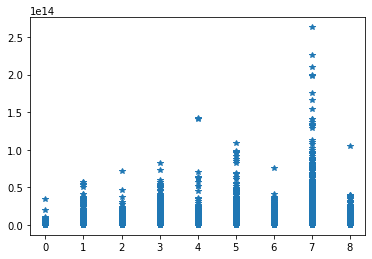

In [9]:
df_Calls = df_Calls[df_Calls['responseTime'] > pd.Timedelta(0)]
df_Calls.dropna(subset=['responseTime'], inplace=True)

print("Minimum response time: ", df_Calls.responseTime.min(), "\n", "This is still very short...")

plt.plot(df_Calls.PoliceDistrict, df_Calls.responseTime, "*")

In [10]:
mean_by_zone = df_Calls.groupby(["PoliceDistrict"])
for group in mean_by_zone:
    print("Average response time in District", group[0], ": ", group[1].responseTime.mean())

Average response time in District 0 :  0 days 00:13:00.604754829
Average response time in District 1 :  0 days 00:09:03.452172129
Average response time in District 2 :  0 days 00:09:29.206847183
Average response time in District 3 :  0 days 00:12:32.738795972
Average response time in District 4 :  0 days 00:10:00.082757738
Average response time in District 5 :  0 days 00:13:23.160003862
Average response time in District 6 :  0 days 00:09:40.297757847
Average response time in District 7 :  0 days 00:20:55.166579144
Average response time in District 8 :  0 days 00:09:09.148467144


In [11]:
#Get 30 most frequent crimes
new_df = df_Calls.TypeText.value_counts()
top_Call_df = df_Calls[df_Calls.TypeText.isin(new_df[2:29].index)]
top_Call_df["TypeText"].unique()

array(['BURGLAR ALARM, SILENT', 'DISCHARGING FIREARM',
       'AUTO ACCIDENT WITH INJURY', 'FIGHT', 'DOMESTIC DISTURBANCE',
       'SIMPLE BATTERY', 'HIT & RUN', 'HOLD UP ALARM',
       'EXTORTION (THREATS)', 'MEDICAL', 'SUSPICIOUS PERSON',
       'MENTAL PATIENT', 'TRAFFIC INCIDENT', 'AREA CHECK',
       'RECKLESS DRIVING', 'SIMPLE BATTERY DOMESTIC', 'NOISE COMPLAINT',
       'SIMPLE BURGLARY VEHICLE', 'SIMPLE CRIMINAL DAMAGE', 'THEFT',
       'AUTO ACCIDENT', 'BUSINESS CHECK', 'PROWLER', 'RESIDENCE BURGLARY',
       'RETURN FOR ADDITIONAL INFO', 'AUTO THEFT', 'THEFT BY FRAUD'],
      dtype=object)

The calls recieved are overwhelmingly either area checks or "complaint other" types. Because these are very generic and non-descriptive categories that don't tell much about the problems a district is facing, and because they skew the dataset by making up a massive portion, we remove those calls.

In [12]:
type_by_district = top_Call_df[['PoliceDistrict','TypeText']].pivot_table(index=['PoliceDistrict'],columns=['TypeText'],aggfunc=np.count_nonzero)
type_by_zipcode = top_Call_df[['Zip','TypeText']].pivot_table(index=['Zip'],columns=['TypeText'],aggfunc=np.count_nonzero)

df_Calls_marg_district = type_by_district.T / type_by_district.T.sum()
df_Calls_marg_zip = type_by_zipcode.T / type_by_zipcode.T.sum()
pop_district = type_by_district.T.idxmax()
pop_zip = type_by_zipcode.T.idxmax()
type_by_district_with_freq =  pd.merge(type_by_district, pop_district.rename('Most Frequent'), 'outer',on='PoliceDistrict')
type_by_zipcode_with_freq = pd.merge(type_by_zipcode, pop_zip.rename('Most Frequent'), 'outer',on='Zip')

**From now on, when regarding crime, only the 30 most frequent types of crime will be used.**

In [13]:
print("Most Frequent Crimes by District:") 
print(pop_district)

Most Frequent Crimes by District:
PoliceDistrict
0    SIMPLE BURGLARY VEHICLE
1                 AREA CHECK
2      BURGLAR ALARM, SILENT
3      BURGLAR ALARM, SILENT
4                 AREA CHECK
5       DOMESTIC DISTURBANCE
6      BURGLAR ALARM, SILENT
7       DOMESTIC DISTURBANCE
8      BURGLAR ALARM, SILENT
dtype: object


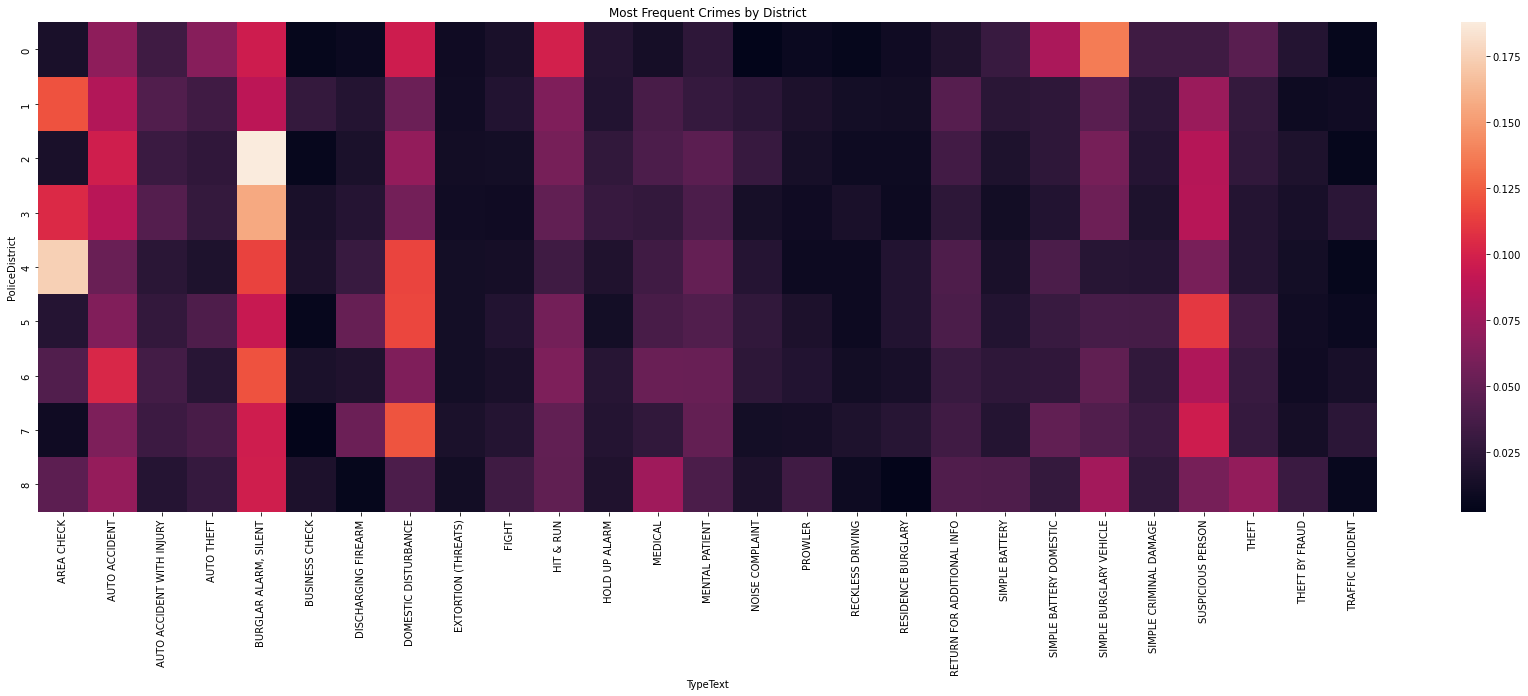

In [14]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by District")

heat_map_districts_marginal = sns.heatmap(df_Calls_marg_district.T)

The graph above is showing the conditional distribution of types of crime by police district, displayed in a heatmap.
This could be a good metric to work with as we analyze the types of crimes and the distribution of crimes in each police district.

<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by District'}, ylabel='PoliceDistrict'>

<AxesSubplot:title={'center':'Count of type of Crime by District'}, ylabel='PoliceDistrict'>

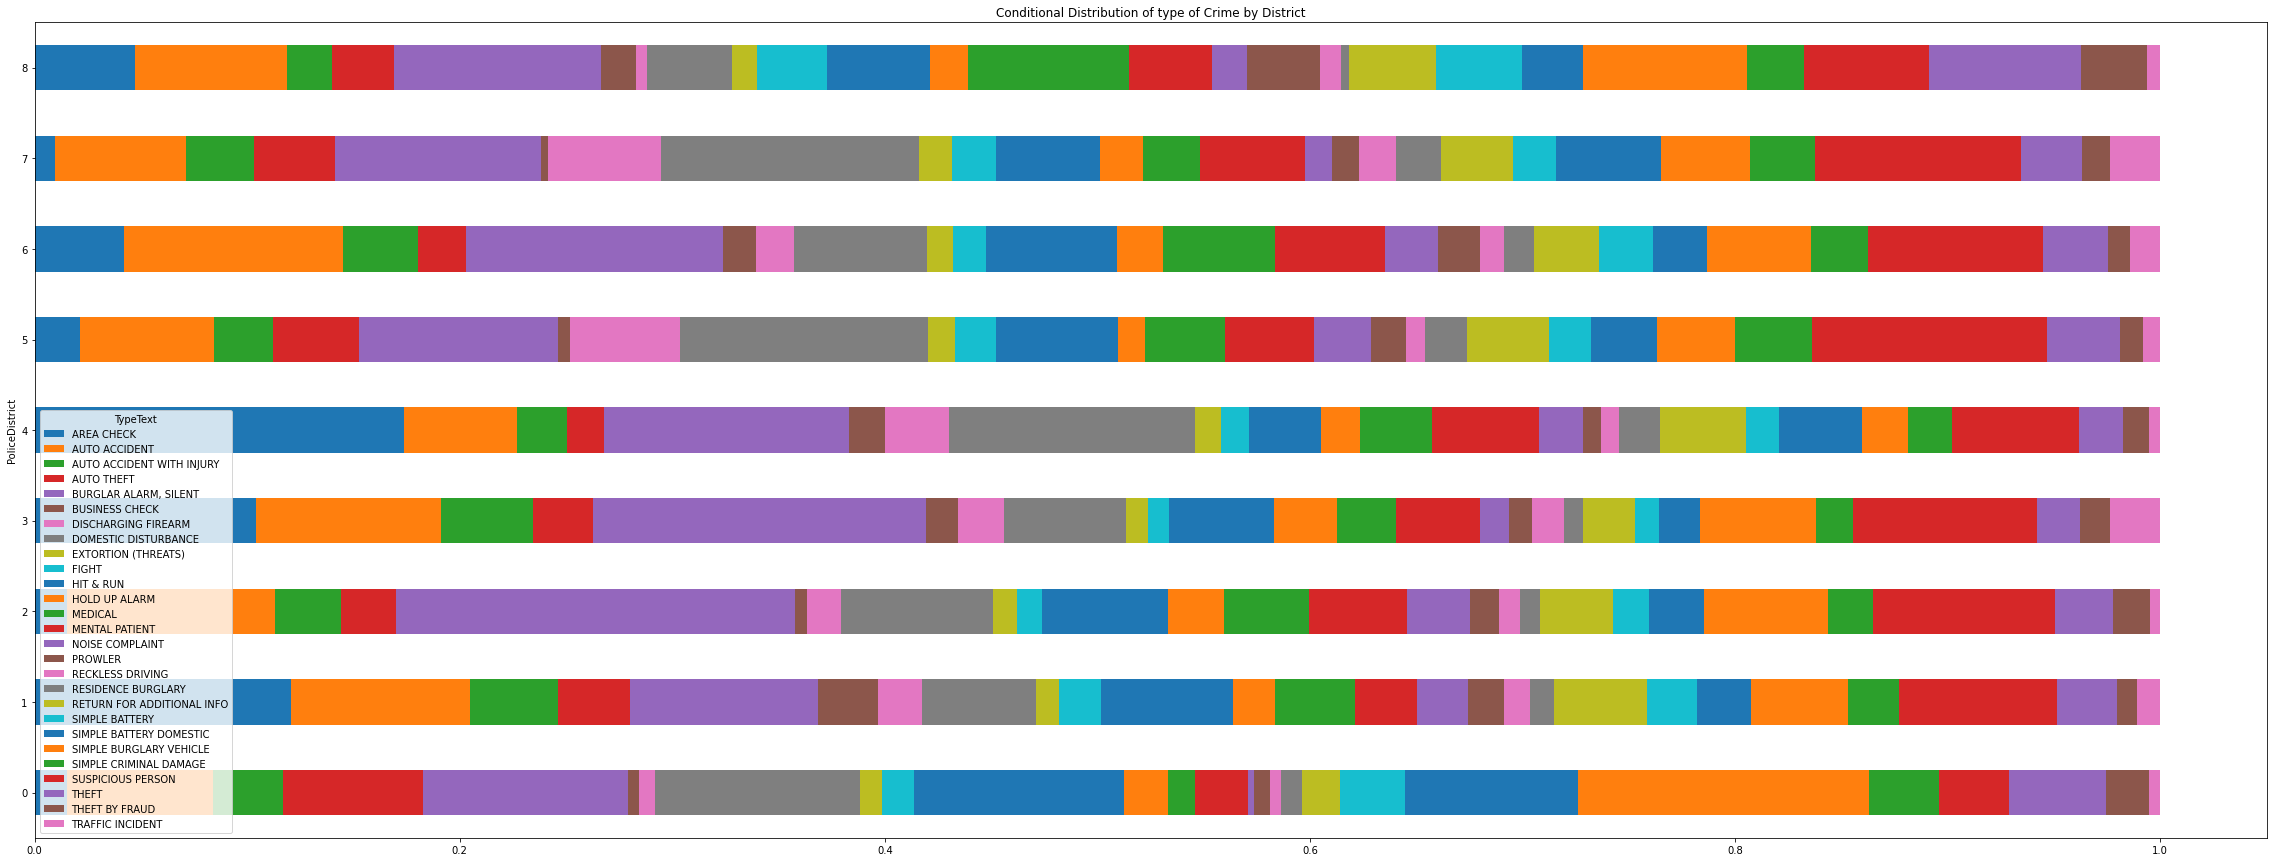

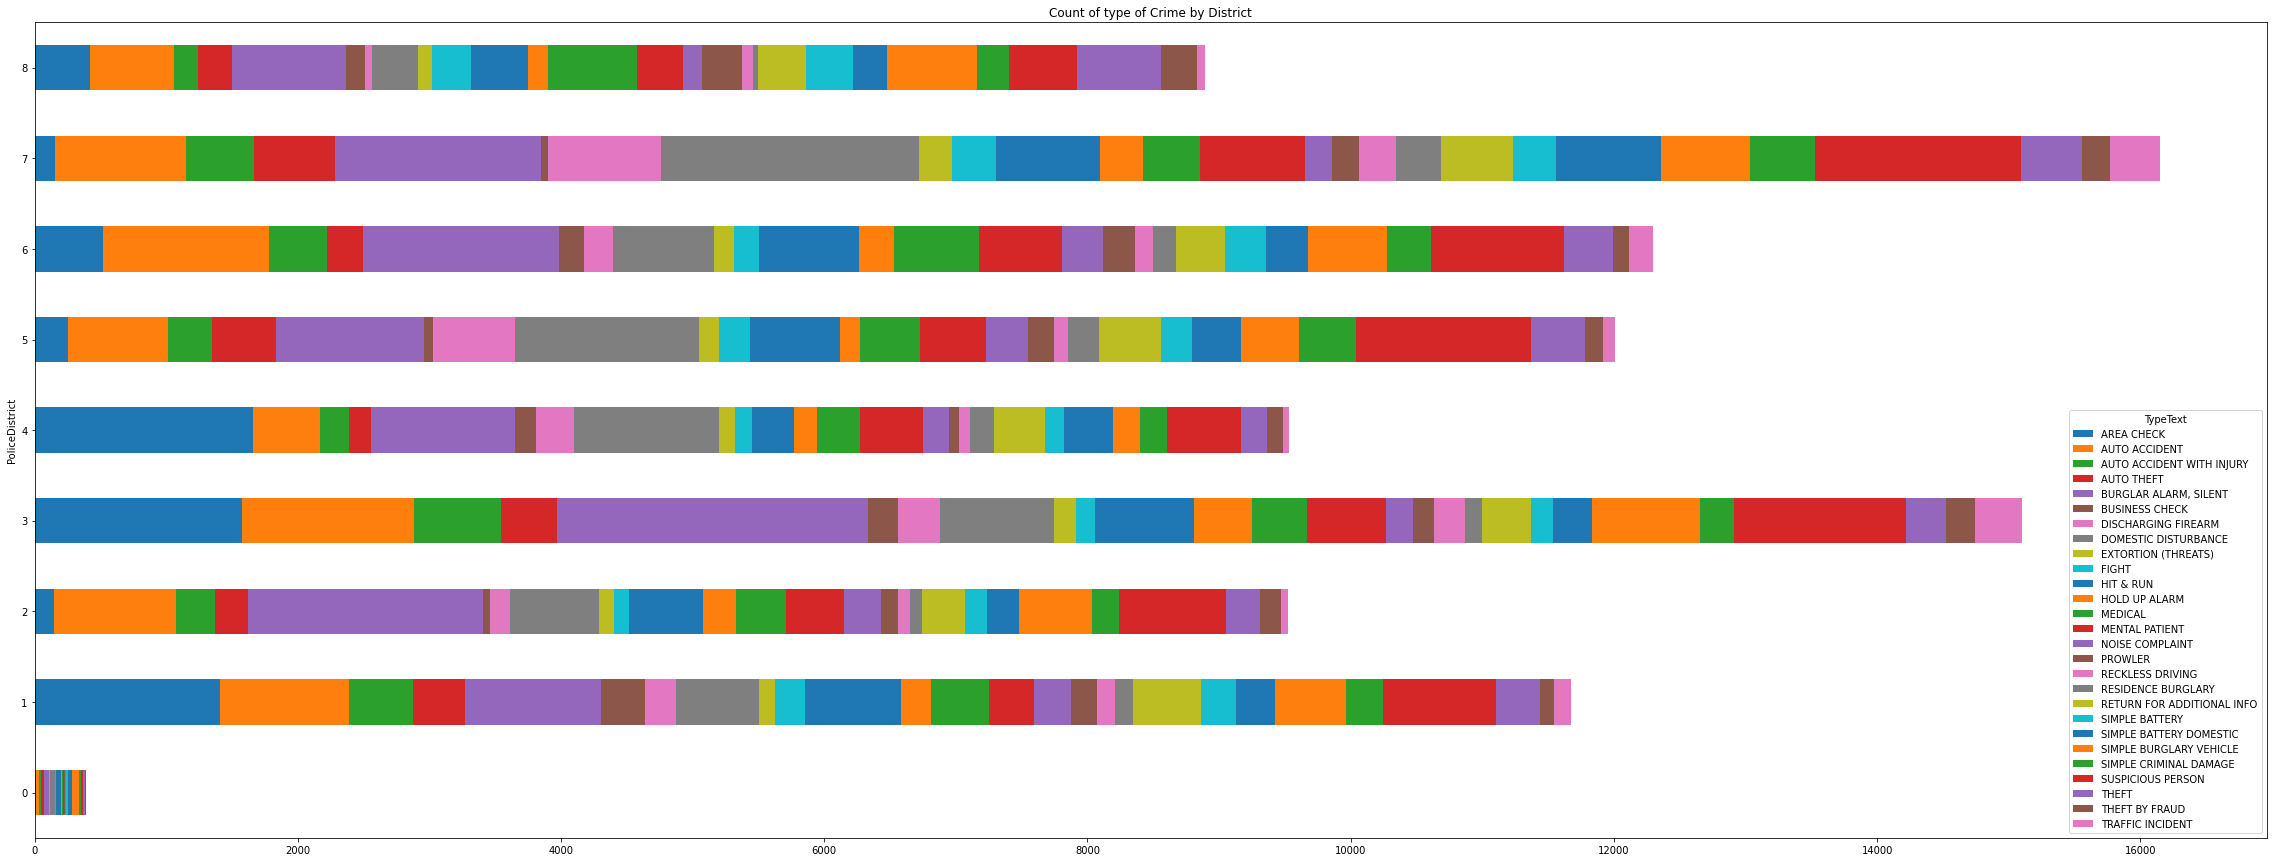

In [15]:
df_Calls_crossTab = pd.crosstab(top_Call_df['PoliceDistrict'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by District"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by District")

The first graph above is the Conditional Distribution of type of Crime by District. The conditional distribution is the probability of a crime type happening in a district. The conditional distribution is calculated by taking the number of crimes of a certain type in a district and dividing it by the total number of crimes in that district.


The second graph above is the Count of type of Crime by District. The count is the number of crimes of a certain type in a district.


Most Frequent Crimes by Zipcode:
Zip
70112              AUTO ACCIDENT
70113              AUTO ACCIDENT
70114                 AREA CHECK
70115      BURGLAR ALARM, SILENT
70116      BURGLAR ALARM, SILENT
70117       DOMESTIC DISTURBANCE
70118      BURGLAR ALARM, SILENT
70119                 AREA CHECK
70122      BURGLAR ALARM, SILENT
70124                 AREA CHECK
70125      BURGLAR ALARM, SILENT
70126       DOMESTIC DISTURBANCE
70127       DOMESTIC DISTURBANCE
70128       DOMESTIC DISTURBANCE
70129       DOMESTIC DISTURBANCE
70130      BURGLAR ALARM, SILENT
70131                 AREA CHECK
70148              AUTO ACCIDENT
None     SIMPLE BURGLARY VEHICLE
dtype: object


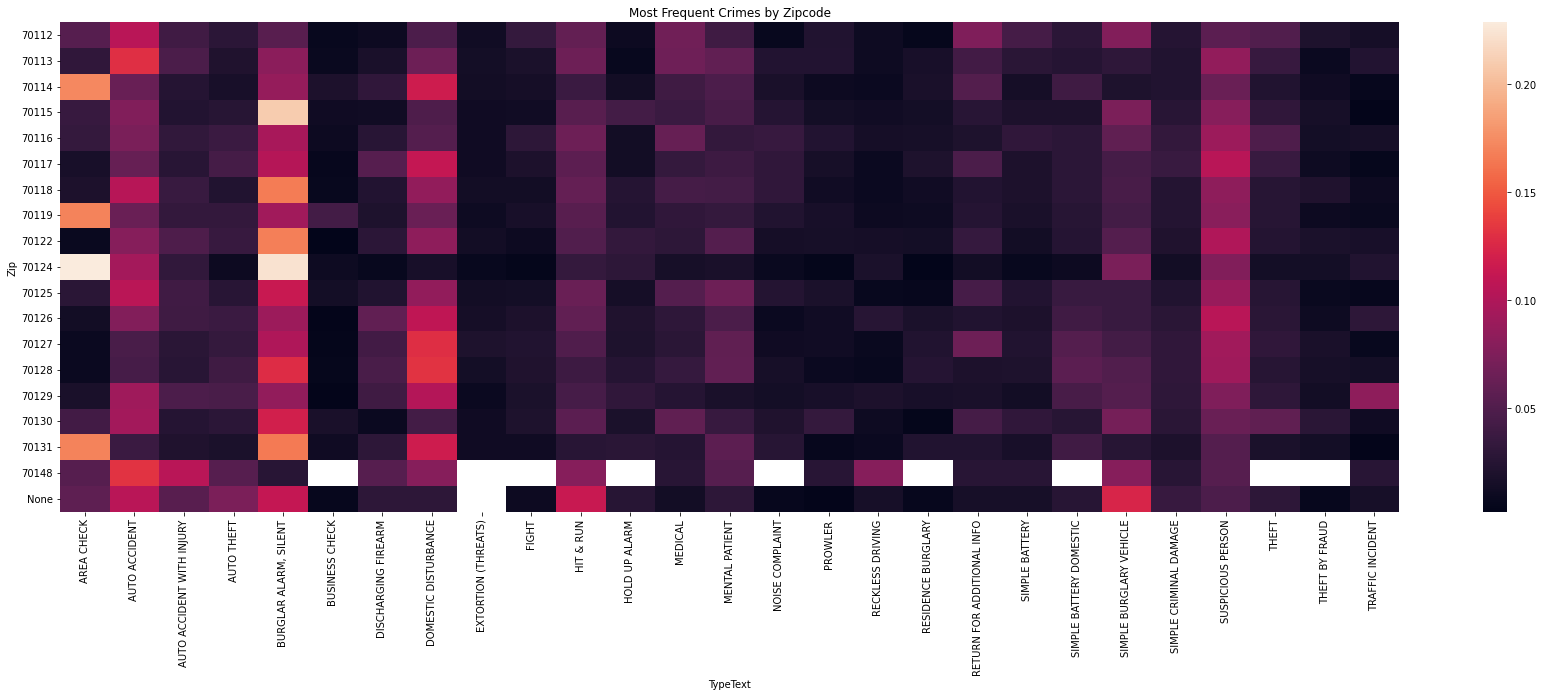

In [16]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by Zipcode")
print("Most Frequent Crimes by Zipcode:")
print(pop_zip)
heat_map_zipcodes_marginal = sns.heatmap(df_Calls_marg_zip.T)
    

The graph above is showing the conditional distribution of types of crime by zipcode, displayed in a heatmap.
This could be a good metric to work with as we analyze the types of crimes and the distribution of crimes in each zipcode.

<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by Zipcode'}, ylabel='Zip'>

<AxesSubplot:title={'center':'Count of type of Crime by Zipcode'}, ylabel='Zip'>

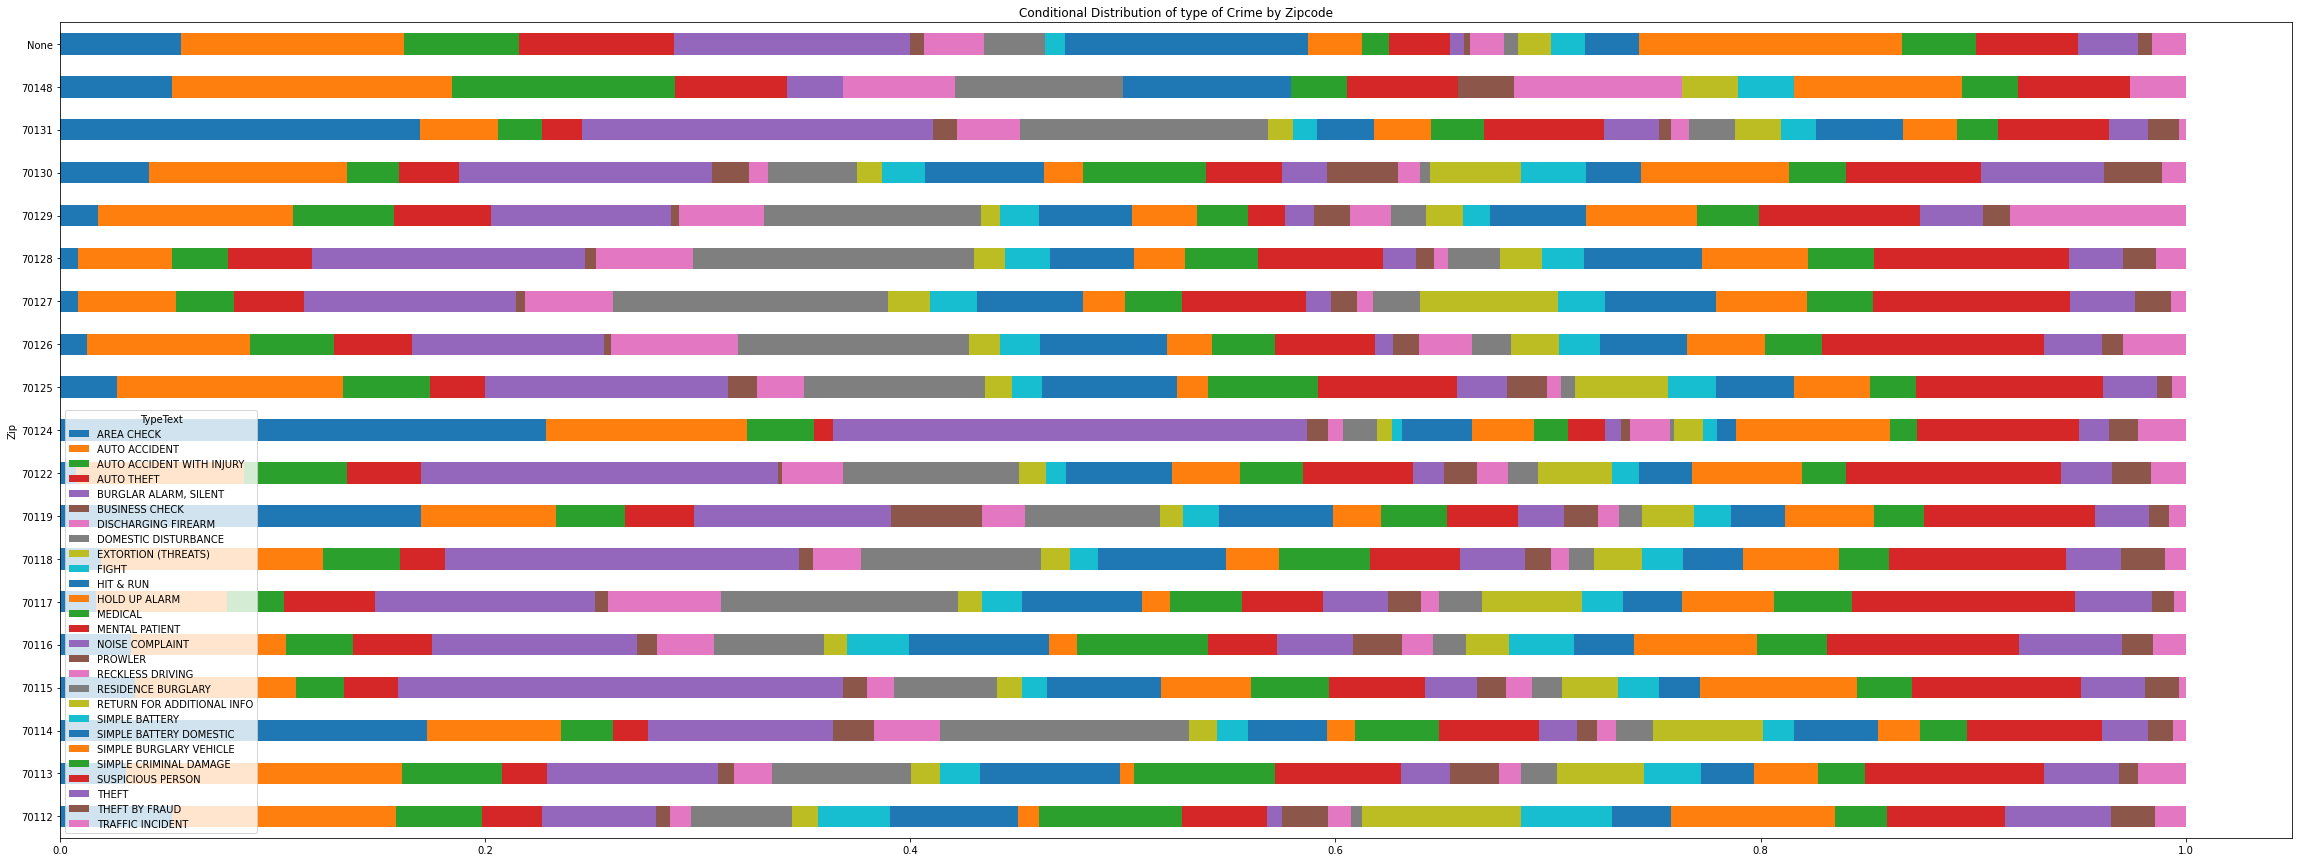

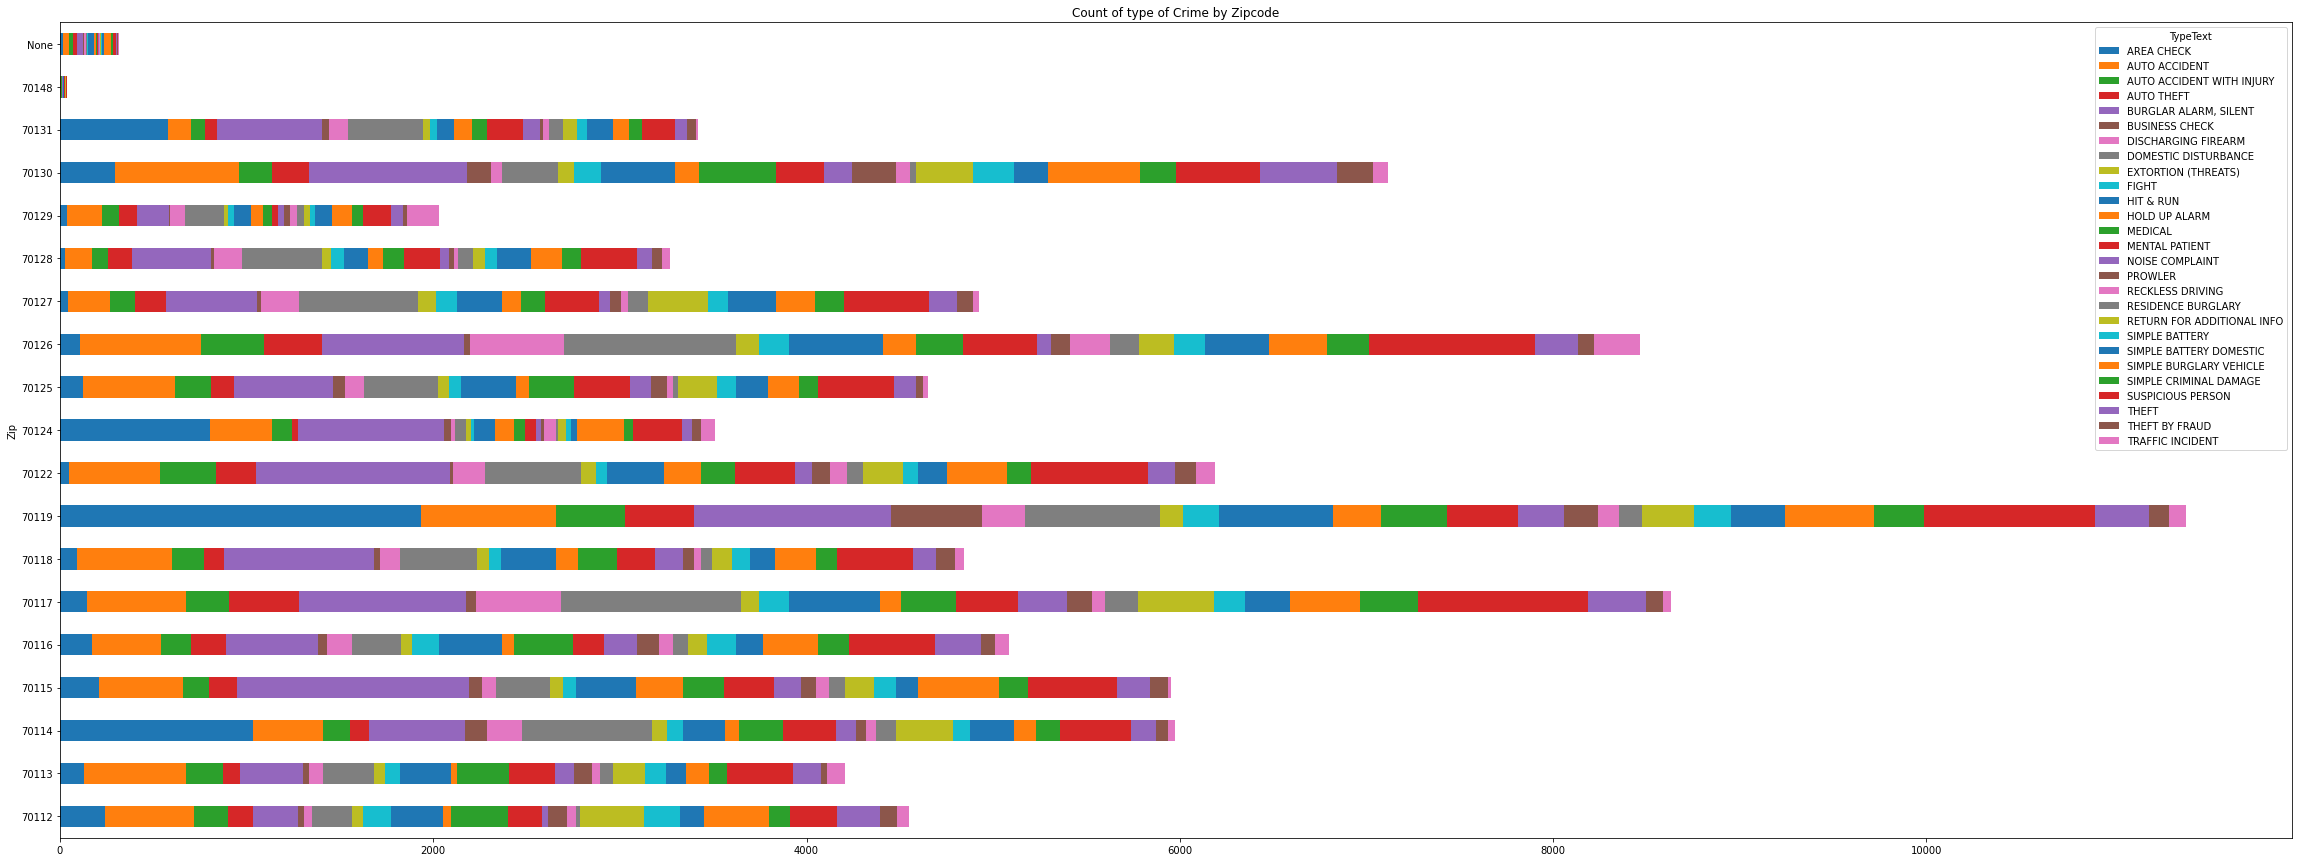

In [17]:
df_Calls_crossTab = pd.crosstab(top_Call_df['Zip'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by Zipcode"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by Zipcode")

The first graph above is the Conditional Distribution of type of Crime by Zipcode. The conditional distribution is the probability of a crime type happening in a Zipcode. The conditional distribution is calculated by taking the number of crimes of a certain type in a Zipcode and dividing it by the total number of crimes in that Zipcode.
The second graph above is the Count of type of Crime by Zipcode. The count is the number of crimes of a certain type in a Zipcode.


**Census Level Data by Zipcode**

The below data is taken from [https://data.census.gov/](https://data.census.gov/) and we have taken certain statistics from the data set that we think would work well for our analysis. These include income, health care coverage, unemployment, and education.
A scraping bot is being built top scrape the data from the site, but for now we have taken the numbers from the site and manually entered them.

In [18]:
#BOT CODE
'''from bs4 import BeautifulSoup as bf
import requests_html as reqHtml
zip_range = df_Calls.Zip.unique()

baseUrl = "https://data.census.gov/cedsci/all?q=ZCTA5"
space_ele = "%20"
income = []
health = []
employment =[]
education = []

requ_Variables = [("Income%20and%20Poverty",income),("%20Health",health),("%20employment",employment),("%20Education",education)]
browser = reqHtml.AsyncHTMLSession()
for zipcodeBase in zip_range:
    for requ_Variable in requ_Variables:
            info = browser.get(baseUrl+space_ele+zipcodeBase+space_ele+requ_Variable[0])  
            print(info)
            #info.html.render()
            parse_HTML = info.page_source
            print(parse_HTML)
            soup = bf(parse_HTML,"html.parser")
            result = soup.find("div",class_="aqua-card-title-text")
            result = result.text
            requ_Variable[1].append(result)'''

####END TEMPORARY BOT CODE

'''print(['70124', '70115', np.nan, '70131', '70126', '70114', '70117', '70116', '70113',
 '70119', '70112', '70122', '70127', '70130', '70128', '70118', '70125', np.nan
 ,'70129', '70148'])'''

zips = ['70124', '70115', np.nan, '70131', '70126', '70114', '70117', '70116', '70113',
 '70119', '70112', '70122', '70127', '70130', '70128', '70118', '70125', np.nan
 ,'70129', '70148']
income = [96844,66499,np.nan,52312,27026,30806,30264,48919,18148,39827,
          49439,39506,27190,53946,36414,48919,46526,np.nan,36950,np.nan] 
health = [3.8,7.2,np.nan,8.9,9.0,10.8,13.6,12.7,14.5,11.6,
          12.1,9.2,8.6,8.1,7.5,7.6,7.9,np.nan,11.7,np.nan] #percent without health care coverage from 2019
employment = [70.5, 66.1, np.nan, 59.5, 51.4, 50.7, 53.3, 54.7, 47.1, 55.5, 69.1, 69.1, 54.2, 50.6, 66.5, 53.2, 57.6,
            56.5, np.nan, 52.5] 
education = [68.3, 60.4, np.nan, 34.1, 20.9, 21.9, 25.9, 41.3, 23.5, 38.1, 58.2, 31.1, 19.4, 57.8, 26.8, 50.5, 41.2,
            np.nan, 13.2, np.nan] 
census_zip_df = pd.DataFrame({"Zip":zips,"Income":income,"Health":health,"Employment":employment,"Education":education})   

census_zip_df.dropna(axis=0)

print("Mean Income:",census_zip_df["Income"].mean())
print("Mean Healthcare %:",census_zip_df["Health"].mean())
print("Mean Employment %:",census_zip_df["Employment"].mean())
print("Mean Education:",census_zip_df["Education"].mean())

top_Call_df = top_Call_df.merge(census_zip_df, on="Zip")

Mean Income: 44090.294117647056
Mean Healthcare %: 9.694117647058825
Mean Employment %: 57.67222222222222
Mean Education: 37.21176470588236


In this dataframe we put together the percent of education bachelors or higher, the percent of employment, mean gross income per capita, and percent without healthcare coverage. This data, organized by zip code, will allow us to associate these demographic features with different regions that experience a high rate of crime, a prevalence of a certain type of crime, or a long response time

**Our Future Plans**
We plan to continue working on this project and expand our analysis to develop a predicitve model of which areas in the parish will get what kind of calls (violent crime, theft, vandalism etc.), when the calls will come in (based on the observed most common time of day for that crime), and what the response time of that kind of call would likely be. This data can help not only establish patterns that would help law enforcement target certain kinds of crime, but would also point towards any district in particular where preparedness needs to be increased (if an area's mean response time significantly deviates from the standard, for example).

Another model we are planning on making is analyzing the cross between the type of crime/ frequency to income and other related fields by zipcodes avaible in the 911 call data set. After analyzing the crossing of data, we hope to find a line or certain characteristics that make some zipcodes more likely to be involved in certain types of crimes. With this "line" or characteristcs, we can then predict the likelihood of a zipcode being involved in a certain type of crime, and be able to tell when zipcodes are creeping towards that line/ ways to escape and improve.

# MODELING

In [27]:
routine_noncriminal = ["AUTO ACCIDENT", "AUTO ACCIDENT WITH INJURY", "BUSINESS CHECK", 'DIRECTED PATROL', 
                       'DISTURBANCE (OTHER)', "MEDICAL", 'MENTAL PATIENT', 'NOISE COMPLAINT', 'RETURN FOR ADDITIONAL INFO',
                       'SUSPICIOUS PERSON', 'TRAFFIC INCIDENT', 'TRAFFIC STOP', 'TOW IMPOUNDED VEHICLE (PRIVATE)',
                       'TRAFFIC STOP']

violent_crime = ['FIGHT', 'HIT & RUN', 'SIMPLE BATTERY', 'SIMPLE BATTERY DOMESTIC']
nonviolent_crime = ['SIMPLE BURGLARY VEHICLE', 'THEFT BY FRAUD', 'SIMPLE CRIMINAL DAMAGE']

potentially_violent_crime = ['THEFT', 'BURGLAR ALARM, SILENT', 'DISCHARGING FIREARM', 'AUTO THEFT', 'HOLD UP ALARM',
                             'RECKLESS DRIVING', 'DOMESTIC DISTURBANCE'] 

top_Call_df['typeCall'] = np.nan

top_Call_df["typeCall"] = top_Call_df.TypeText.map(lambda x: 'routine_noncriminal' if (x in routine_noncriminal) else 'violent_crime' if (x in violent_crime) else 'nonviolent_crime' if (x in nonviolent_crime) else 'potentially_violent_crime' if (x in potentially_violent_crime) else "other")
top_Call_df["typeRank"] = top_Call_df.TypeText.map(lambda x: 0 if (x in routine_noncriminal) else 3 if (x in violent_crime) else 1 if (x in nonviolent_crime) else 2 if (x in potentially_violent_crime) else np.nan)
time_of_day = top_Call_df.TimeCreate.dt.hour
top_Call_df['Hour'] = time_of_day
top_Call_df['TimeOfDay'] =top_Call_df.Hour.map(lambda x: 'Morning' if (x< 12 and x>5) else 'Afternoon' if x < 18 else 'Evening/Night')
#remove outliers from timeresponse
#top_Call_df
top_call_df = top_Call_df[top_Call_df.responseTime.between(top_Call_df.responseTime.quantile(0.05), top_Call_df.responseTime.quantile(0.95))]

C:\WINDOWS\TEMP/ipykernel_9996/3719701656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_call_df['responseSeconds'] = top_Call_df.responseTime.dt.seconds


<AxesSubplot:xlabel='Income', ylabel='responseSeconds'>

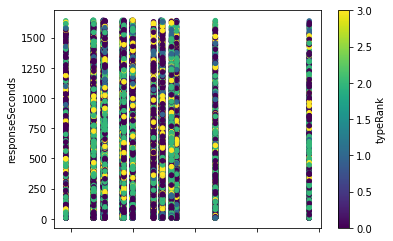

In [41]:

#top_Call_df.plot.scatter(x='responseTime',y='typeRank',cmap='viridis')
top_call_df['responseSeconds'] = top_Call_df.responseTime.dt.seconds
top_call_df.plot.scatter(y='responseSeconds',x='Income',c='typeRank',cmap='viridis')



good data

In [21]:
top_Call_df.groupby('typeCall')

KeyError: 'ResponseTime'

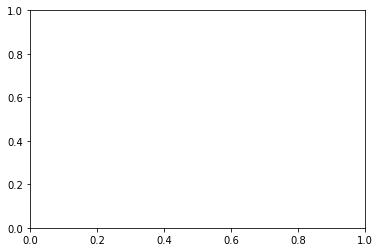